In [1]:
import pandas as pd
import numpy as np
import matplotlib. pyplot as plt
from scipy.stats import norm

In [40]:
import pandas_datareader.data as web
import pandas as pd

# List of Fama-French datasets to fetch
datasets = [
    "F-F_Research_Data_Factors",  # Fama-French 3 Factors (Market, SMB, HML)
    "F-F_Research_Data_5_Factors_2x3",  # Fama-French 5 Factors (Market, SMB, HML, RMW, CMA)
    "F-F_Momentum_Factor",  # Carhart 4th Momentum Factor
    "F-F_ST_Reversal_Factor",  # Short-Term Reversal Factor
    "F-F_LT_Reversal_Factor"  # Long-Term Reversal Factor
]

# Fetch data from the Fama-French dataset
fama_french_data = {}

for dataset in datasets:
    try:
        fama_french_data[dataset] = web.DataReader(dataset, "famafrench")
        print(f"Downloaded: {dataset}")
    except Exception as e:
        print(f"Failed to download {dataset}: {e}")

# Extracting and saving the datasets into CSV files
for dataset, data in fama_french_data.items():
    # The returned data is a dictionary where key 0 contains the main DataFrame
    df = data[0]  # Main dataset
    
    # Save to CSV file
    df.to_csv(f"data/{dataset}.csv")
    print(f"Saved {dataset}.csv")
    dfs.append(df)

/var/folders/6l/37fpcl_x1q35pn2314knfvb40000gn/T/ipykernel_7938/3992272418.py:18: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  fama_french_data[dataset] = web.DataReader(dataset, "famafrench")
/var/folders/6l/37fpcl_x1q35pn2314knfvb40000gn/T/ipykernel_7938/3992272418.py:18: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  fama_french_data[dataset] = web.DataReader(dataset, "famafrench")


Downloaded: F-F_Research_Data_Factors


/var/folders/6l/37fpcl_x1q35pn2314knfvb40000gn/T/ipykernel_7938/3992272418.py:18: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  fama_french_data[dataset] = web.DataReader(dataset, "famafrench")
/var/folders/6l/37fpcl_x1q35pn2314knfvb40000gn/T/ipykernel_7938/3992272418.py:18: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  fama_french_data[dataset] = web.DataReader(dataset, "famafrench")


Downloaded: F-F_Research_Data_5_Factors_2x3


/var/folders/6l/37fpcl_x1q35pn2314knfvb40000gn/T/ipykernel_7938/3992272418.py:18: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  fama_french_data[dataset] = web.DataReader(dataset, "famafrench")
/var/folders/6l/37fpcl_x1q35pn2314knfvb40000gn/T/ipykernel_7938/3992272418.py:18: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  fama_french_data[dataset] = web.DataReader(dataset, "famafrench")


Downloaded: F-F_Momentum_Factor


/var/folders/6l/37fpcl_x1q35pn2314knfvb40000gn/T/ipykernel_7938/3992272418.py:18: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  fama_french_data[dataset] = web.DataReader(dataset, "famafrench")
/var/folders/6l/37fpcl_x1q35pn2314knfvb40000gn/T/ipykernel_7938/3992272418.py:18: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  fama_french_data[dataset] = web.DataReader(dataset, "famafrench")


Downloaded: F-F_ST_Reversal_Factor
Downloaded: F-F_LT_Reversal_Factor
Saved F-F_Research_Data_Factors.csv
Saved F-F_Research_Data_5_Factors_2x3.csv
Saved F-F_Momentum_Factor.csv
Saved F-F_ST_Reversal_Factor.csv
Saved F-F_LT_Reversal_Factor.csv


/var/folders/6l/37fpcl_x1q35pn2314knfvb40000gn/T/ipykernel_7938/3992272418.py:18: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  fama_french_data[dataset] = web.DataReader(dataset, "famafrench")
/var/folders/6l/37fpcl_x1q35pn2314knfvb40000gn/T/ipykernel_7938/3992272418.py:18: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  fama_french_data[dataset] = web.DataReader(dataset, "famafrench")


In [41]:
len(dfs)

10

## 1. Download basic factors for Europe from Fama French

In [69]:
# Define Fama-French factors URL
ff_url = "https://mba.tuck.dartmouth.edu/pages/faculty/ken.french/ftp/Europe_3_Factors_Daily_CSV.zip"

# american market for checking differences
# ff_url = "https://mba.tuck.dartmouth.edu/pages/faculty/ken.french/ftp/F-F_Research_Data_Factors_daily_CSV.zip"

# Download and read the data
ff_factors = pd.read_csv(ff_url, skiprows=3)

# Remove last row (which contains copyright info)
ff_factors = ff_factors.iloc[:-1]

# Convert index column to datetime format
ff_factors.iloc[:, 0] = pd.to_datetime(ff_factors.iloc[:, 0], format='%Y%m%d')
ff_factors.set_index(ff_factors.columns[0], inplace=True)

# Save to CSV (optional)
ff_factors.to_csv("fama_french_factors.csv")

ff_factors = ff_factors / 100
ff_factors = ff_factors.drop(columns = ['RF'])
# Display the first few rows
ff_factors.head()

,Mkt-RF,SMB,HML
Unnamed: 0,,,
1990-07-02,0.0099,0.0006,-0.0056
1990-07-03,0.0033,-0.0011,0.0000
1990-07-04,0.0024,0.0000,-0.0019
1990-07-05,-0.0064,0.0020,0.0008
1990-07-06,0.0007,-0.0018,0.0013


In [70]:
ff_factors_daily = ff_factors.copy()

# 2. Calculate monthly volatility of the market & set factors to monthly observations

In [71]:
monthly_mkt_lagged_std = ff_factors['Mkt-RF'].resample('M').std()*np.sqrt(21)
# this variable constains observations of monthly colatility for the previous month. For example,
# 1990-08-31 observation has info about month 1990-08.
monthly_mkt_lagged_std.head()

Unnamed: 0
1990-07-31    0.021086
1990-08-31    0.058849
1990-09-30    0.039960
1990-10-31    0.053065
1990-11-30    0.030129
Freq: M, Name: Mkt-RF, dtype: float64

I set factors to their monthly observations to be consistent with the source paper

In [72]:
ff_factors = (ff_factors+1).resample('M').prod()-1

In [73]:
ff_factors.head()

,Mkt-RF,SMB,HML
Unnamed: 0,,,
1990-07-31,0.044080,0.002501,-0.014345
1990-08-31,-0.107923,0.000244,-0.003822
1990-09-30,-0.121506,0.022221,0.004685
1990-10-31,0.064231,-0.026097,-0.010287
1990-11-30,-0.004146,-0.026249,0.005797


The monthly data is also used, because rabalancing is done monthly.

## 2. Design parametric portfolio

In [129]:
def MVP_w(returns):
    """
    Compute the weights of the Minimum Variance Portfolio (MVP) given asset return data.

    Parameters:
    returns (pd.DataFrame): A DataFrame where each column represents the returns of a different asset.

    Returns:
    np.ndarray: A 1D array containing the optimal weights for each asset in the minimum variance portfolio.

    Description:
    - This function calculates the weights of the Minimum Variance Portfolio (MVP), which is the portfolio 
      that minimizes risk (variance) while achieving a given level of expected return.
    - It does so by solving for the weights that minimize portfolio variance using the formula:
      
      w = (V⁻¹ * μ) / (1ᵀ * V⁻¹ * μ)
      
      where:
      - V is the covariance matrix of asset returns.
      - μ is the vector of expected returns.
      - 1 is a vector of ones (to sum weights to 1).
    """
    
    ones = np.ones(len(returns.columns))
    mu = returns.mean()
    V = returns.cov()
    
    numerator = np.linalg.inv(V) @ mu
    denominator = ones.T @ numerator
    w = numerator / denominator
    return w 

def Market_w(returns):
    """
    Returns weights that are equal to 1 for market and 0 for other factors
    """
    return [1]+ (len(returns.columns)-1)*[0]

def EW_w(returns):
    """
    Equally weighted portfolio
    """
    return (len(returns.columns))*[1/len(returns.columns)]

def sharpe_ratio(returns, frequency=252, Rf=0):
    """
    Calculate the Sharpe Ratio of a given asset or portfolio.

    Parameters:
    returns (pd.Series or pd.DataFrame): A series or DataFrame of asset returns.
    frequency (int, optional): The number of trading periods in a year (default is 252 for daily returns).
    Rf (float, optional): The risk-free rate (default is 0).

    Returns:
    float or pd.Series: The Sharpe Ratio, which measures risk-adjusted return.

    Description:
    - The Sharpe Ratio evaluates the excess return per unit of risk (volatility).
    - It is calculated as:

      SR = (E[R] - Rf) / σ

      where:
      - E[R] is the expected return (mean return annualized).
      - Rf is the risk-free rate.
      - σ is the standard deviation of returns (annualized).
    - Higher values indicate better risk-adjusted performance.

    Notes:
    - If `returns` is a DataFrame, the function returns a Series of Sharpe Ratios for each asset.
    - Assumes returns are in decimal form (e.g., 0.01 for 1%).
    """
    
    mean_return = returns.mean()
    vol = returns.std()
    
    y_mean_return = mean_return * frequency
    y_vol = vol * np.sqrt(frequency)  # Fixed variable name (was 'm_vol')

    SR = (y_mean_return - Rf) / y_vol
    return SR

def sharpe_ratio_difference_test(returns_n, returns_m, sr_n, sr_m):
    """
    Computes the Jobson-Korkie-Memmel (JKM) test statistic to evaluate whether 
    the difference in Sharpe Ratios between two portfolios is statistically significant.
    
    Parameters:
    - returns_n: Daily returns of portfolio n (e.g., alternative strategy)
    - returns_m: Daily returns of portfolio m (e.g., market benchmark)
    - sr_n: Sharpe Ratio of portfolio n
    - sr_m: Sharpe Ratio of portfolio m
    - T: Number of observations (trading days)

    Returns:
    - z_stat: Z-score indicating how significant the difference in Sharpe Ratios is
    - p_value: P-value (small p-value means the difference is statistically significant)
    """
    
    T = len(returns_n) 
    
    # Compute correlation between excess returns of the two portfolios
    rho_nm = np.corrcoef(returns_n.astype(np.float32), returns_m.astype(np.float32))[0, 1]

    # Compute variance of the difference in Sharpe Ratios using the Jobson-Korkie-Memmel formula
    variance_diff = (1 / T) * (2 - 2 * rho_nm + 0.5 * (sr_n**2 + sr_m**2 - 2 * sr_n * sr_m * rho_nm**2))

    # Compute the test statistic (Z-score), which measures how different the Sharpe Ratios are
    z_stat = (sr_n - sr_m) / np.sqrt(variance_diff)

    # Compute the two-tailed p-value, which tests if the difference is statistically significant
    p_value = 2 * (1 - norm.cdf(abs(z_stat)))

    # Return the test statistic and p-value
    return p_value.round(3)


def get_first_last_dates_each_month(df):
    """
    Given a DataFrame with dates as index, this function returns a DataFrame
    containing the first and last date for each month.

    Parameters:
    df (pd.DataFrame): DataFrame with a datetime index.

    Returns:
    pd.DataFrame: A DataFrame with first and last date of each month.
    """

    # Convert index to datetime if not already
    df.index = pd.to_datetime(df.index)

    # Group by year-month and find first and last date
    first_dates = df.groupby(df.index.to_period('M')).apply(lambda x: x.index.min())
    last_dates = df.groupby(df.index.to_period('M')).apply(lambda x: x.index.max())

    # Create a DataFrame with results
    date_summary = pd.DataFrame({'First_Date': first_dates, 'Last_Date': last_dates})

    return date_summary

def find_optimal_rebalancing_weights(daily_returns, 
                                     dates_of_period_start_and_end,
                                     weight_optimization_function,
                                     est_window=120):
    """
    Computes the optimal portfolio weights for rebalancing at the start of each month 
    using a rolling estimation window of past returns.

    Parameters:
    - daily_returns (pd.DataFrame): A DataFrame containing daily return data with dates as index. 
      Monthly returns can be used too
    - dates_of_period_start_and_end (pd.DataFrame): A DataFrame containing the first and last trading 
      dates of each month, with columns ['First_Date', 'Last_Date'].
    - est_window (int): The number of months used for the estimation window (default is 120 months).

    Returns:
    - pd.DataFrame: A DataFrame where each row corresponds to the rebalancing date and contains 
      the optimal portfolio weights for that period.
    """

    # Initialize an empty DataFrame to store optimal weights at the start of each month
    weights_start_of_month = pd.DataFrame(columns=daily_returns.columns)

    # Iterate over each month to determine rebalancing weights
    for month_number in np.arange(est_window, dates_of_period_start_and_end.shape[0], 1):

        # Determine the start and end dates of the rolling estimation window
        start_date_of_sample = dates_of_period_start_and_end.loc[:, 'First_Date'].iloc[month_number - est_window]  # Oldest date in the estimation window
        end_date_of_sample = dates_of_period_start_and_end.loc[:, 'Last_Date'].iloc[month_number - 1]  # Last date before rebalancing

        # Extract the estimation dataset (past returns used to compute optimal weights)
        estimation_dataset = daily_returns.loc[start_date_of_sample:end_date_of_sample, :]

        # Compute optimal portfolio weights based on the estimation dataset
        optimal_weights = weight_optimization_function(estimation_dataset)

        # Determine the rebalancing date (first trading day of the current month)
        rebalancing_date = dates_of_period_start_and_end.loc[:, 'First_Date'].iloc[month_number]

        # Store the computed optimal weights for the corresponding rebalancing date
        weights_start_of_month.loc[rebalancing_date, :] = optimal_weights

    return weights_start_of_month


def compute_weight_drift_oos(dates_of_period_start_and_end_oos, returns_daily_oos, weights_start_of_month):
    """
    Compute the weight drift for each day in the out-of-sample (OOS) dataset by tracking how 
    portfolio weights evolve due to factor returns over time.

    Parameters:
    - dates_of_period_start_and_end_oos (pd.DataFrame): DataFrame containing 'First_Date' and 'Last_Date' for each period.
    - returns_daily_oos (pd.DataFrame): DataFrame containing daily returns of assets (factors, stocks, or other instruments).
    - weights_start_of_month (pd.DataFrame): DataFrame containing initial weights at the start of each month.

    Returns:
    - weights_end_of_month (pd.DataFrame): Drifted weights at the last date of each period.
    - weights_daily (pd.DataFrame): Drifted weights for **every single day** in the dataset.
    """

    # Initialize DataFrames to store drifted weights
    weights_end_of_month = pd.DataFrame(index=dates_of_period_start_and_end_oos["Last_Date"],
                                        columns=weights_start_of_month.columns)
    
    weights_daily = pd.DataFrame(index=returns_daily_oos.index, columns=weights_start_of_month.columns)

    # Iterate over each month to compute weight drift
    for _, row in dates_of_period_start_and_end_oos.iterrows():
        start_date, end_date = row["First_Date"], row["Last_Date"]

        # Get initial weights at the start of the month
        initial_weights = weights_start_of_month.loc[start_date]

        # Extract daily returns for the period
        monthly_returns = returns_daily_oos.loc[start_date:end_date]

        if not monthly_returns.empty:
            # Compute cumulative returns over the period
            portfolio_values = (1 + monthly_returns).cumprod()

            # Compute drifted weights for each day
            for current_date in monthly_returns.index:
                daily_values = initial_weights * portfolio_values.loc[current_date]
                weights_daily.loc[current_date] = daily_values / daily_values.sum()

            # Store drifted weights at the last date of the month
            final_values = initial_weights * portfolio_values.iloc[-1]
            weights_end_of_month.loc[end_date] = final_values / final_values.sum()
        else:
            raise ValueError(f"! Monthly returns not found for period {start_date} - {end_date}")

    return weights_end_of_month, weights_daily

The estimation window is 120 months. I apply rolling window of 120 months to find optimal weights for portfolio of factors for the next period.

In [130]:
def find_portfolio_returns(ff_factors_daily,
                           weight_optimization_function,
                           est_window = 120
                          ):

    """
    This is main function that calls all other functions 
    one by one to find optimal weight allocations,
    weight drifts and find returns
    """
    # find the first and last trading date for each month
    dates_of_period_start_and_end = get_first_last_dates_each_month(ff_factors_daily)
    
    # find weights for start of each month out of sample
    weights_start_of_month = find_optimal_rebalancing_weights(ff_factors_daily, 
                                                              dates_of_period_start_and_end,
                                                              weight_optimization_function = weight_optimization_function,
                                                              est_window = est_window)

    # to make all weights equal to the initial allocation
    # weights_start_of_month[:] = weights_start_of_month.iloc[0]
    
    # find all dates in the first and last trading date for each month that are out of sample
    dates_of_period_start_and_end_oos = dates_of_period_start_and_end[
            dates_of_period_start_and_end["First_Date"].isin(weights_start_of_month.index)]
    
    # find out of sample observations of factor returns
    ff_factors_daily_oos = ff_factors_daily.loc[weights_start_of_month.index[0]:,:]
    
    # within each First_Date and each Last_Date the weights drift. Hence, one needs 
    # to find cumulative return between each of those dates to find the actual weights
    # this will allow to find actual returns of the portfolio
    # and this will allow also to account for transaction costs correctly, because difference 
    # between last date of the month weight and first date of the month weight is the actual transaction cost
    
    weights_end_of_month, weights_daily = compute_weight_drift_oos(dates_of_period_start_and_end_oos,
                                                                   ff_factors_daily_oos, 
                                                                   weights_start_of_month)
    
    portfolio_return_oos = np.sum(weights_daily*ff_factors_daily_oos, axis = 1)
    
    # some tresholds on daily returns, because some models may go wrong
    portfolio_return_oos[portfolio_return_oos>0.3] = 0.3
    portfolio_return_oos[portfolio_return_oos<-0.3] = -0.3
    
    return portfolio_return_oos, weights_start_of_month, weights_end_of_month, weights_daily

In [131]:
market_portfolio,_,_, weights_daily_mkt = find_portfolio_returns(ff_factors_daily,
                                           Market_w,
                                           est_window = 120
                                          )

In [132]:
mpv_portfolio,_,_, weights_daily_mvp = find_portfolio_returns(ff_factors_daily,
                                           MVP_w,
                                           est_window = 120
                                          )

In [133]:
ew_portfolio,_,_, weights_daily_mvp = find_portfolio_returns(ff_factors_daily,
                                           EW_w,
                                           est_window = 120
                                          )

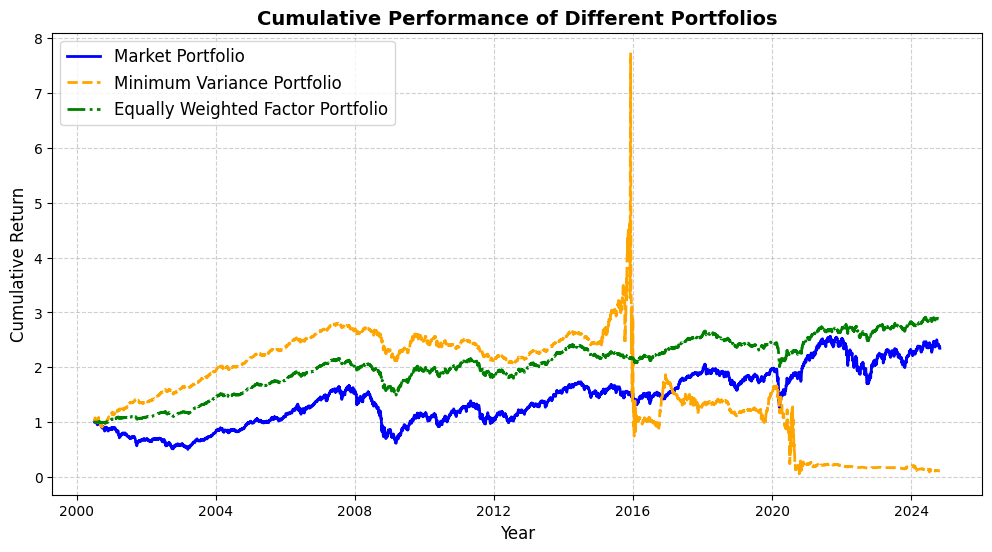

In [134]:
# Assuming market_portfolio, mpv_portfolio, and ew_portfolio are already defined Pandas Series

# Create a figure with increased size for better readability
plt.figure(figsize=(12, 6))

# Plot cumulative returns for each portfolio
plt.plot((1 + market_portfolio).cumprod(), label="Market Portfolio", linewidth=2, linestyle='-', color='blue')
plt.plot((1 + mpv_portfolio).cumprod(), label="Minimum Variance Portfolio", linewidth=2, linestyle='--', color='orange')
plt.plot((1 + ew_portfolio).cumprod(), label="Equally Weighted Factor Portfolio", linewidth=2, linestyle='-.', color='green')

# Add title and labels
plt.title("Cumulative Performance of Different Portfolios", fontsize=14, fontweight='bold')
plt.xlabel("Year", fontsize=12)
plt.ylabel("Cumulative Return", fontsize=12)

# Add grid and legend
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(fontsize=12, loc="upper left")

# Show the plot
plt.show()

In [135]:
#visit: https://www.linkedin.com/posts/michael-aked_moreira-and-muir-2017-show-that-managed-activity-7116890003309268992-53R3?trk=public_profile_like_view

To add:

- volatility-managed factors
- more factors
- SR test
- find out why portfolio is so bad performing $weights = \alpha_k +\beta_k*1/\sigma_t$ where alpha and beta do not depend on time?

In [136]:
# Calculate Sharpe Ratios for each portfolio
sharpe_ratios = {
    "Market Portfolio": sharpe_ratio(market_portfolio),
    "Minimum Variance Portfolio": sharpe_ratio(mpv_portfolio),
    "Equally Weighted Factor Portfolio": sharpe_ratio(ew_portfolio)
}

# Convert results into a DataFrame
sharpe_df = pd.DataFrame.from_dict(sharpe_ratios, orient='index', columns=["Sharpe Ratio"])

sharpe_df.loc['Minimum Variance Portfolio', 'p-value vs mkt'] = sharpe_ratio_difference_test(mpv_portfolio,
                                                                                                  market_portfolio,
                                                                                                  sharpe_ratio(mpv_portfolio),
                                                                                                  sharpe_ratio(market_portfolio))

sharpe_df.loc['Equally Weighted Factor Portfolio', 'p-value vs mkt'] = sharpe_ratio_difference_test(ew_portfolio, 
                                                                                                         market_portfolio,
                                                                                                         sharpe_ratio(ew_portfolio), 
                                                                                                         sharpe_ratio(market_portfolio))

sharpe_df

,Sharpe Ratio,p-value vs mkt
Market Portfolio,0.272369,NaN
Minimum Variance Portfolio,0.135025,0.0
Equally Weighted Factor Portfolio,0.722937,0.0
